## Checking experiment configurations

This notebook compares a new experiment against the MOM5 control simulation (forced using a 20 year averaged ACCESS-OM2 simulation). We compare wind stress in x and y directions, as well as the four input heat fluxes: shortwave radiation, longwave radition, sensible heat and latent heat. The notebook can be extended to compare other fluxes too, such as rainfall, snowfall, salt fluxes, etc.

In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = ResourceWarning)
warnings.filterwarnings('ignore', category = BytesWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

In [3]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/36023/status,
Dashboard: /proxy/36023/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46573,Workers: 4
Dashboard: /proxy/36023/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:38769,Total threads: 2
Dashboard: /proxy/36725/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:34789,


In [4]:
db = '/scratch/x77/db6174/mom/archive/databases/025deg_jra55_ryf/cc_database_control.db'
session_con1 = cc.database.create_session(db)

db = '/scratch/x77/db6174/mom/archive/databases/025deg_jra55_ryf/cc_database_flux_forced_vary_heat_stress_uniform.db'
session_con2 = cc.database.create_session(db)

session = [session_con1, session_con2]
expt = ['025deg_jra55_ryf_control', '025deg_jra55_ryf_fluxH_neg10W_fluxS_050x']
name = ['Control', 'Perturbation']

In [5]:
start_time = '2202-01-01'
end_time = '2202-02-01'

# Wind stress factor for new simulation
x = 0.5

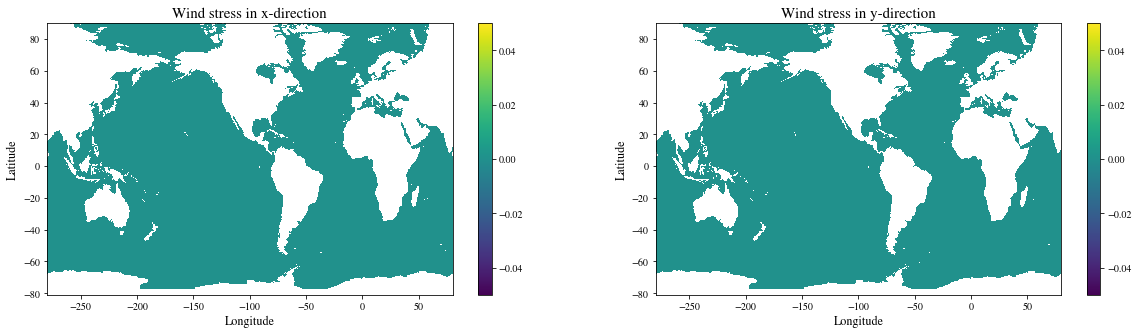

In [6]:
# Wind stress comparison

var_list = ['tau_x', 'tau_y']
name = ['Wind stress in x-direction', 'Wind stress in y-direction']

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
for i, j in enumerate(var_list):
    var1 = cc.querying.getvar(expt = expt[0], session = session[0], variable = var_list[i], frequency = '1 monthly', use_cftime = True).sel(
        time = slice(start_time, end_time))
    var2 = cc.querying.getvar(expt = expt[1], session = session[1], variable = var_list[i], frequency = '1 monthly', use_cftime = True).sel(
        time = slice(start_time, end_time))
    var1 = var1.rename('')
    var2 = var2.rename('')
    (var2 - x * var1).mean('time').plot(ax = axes[i])
    axes[i].set_title(name[i], fontsize = 15)
    axes[i].set_xlabel('Longitude', fontsize = 12)
    axes[i].set_ylabel('Latitude', fontsize = 12)

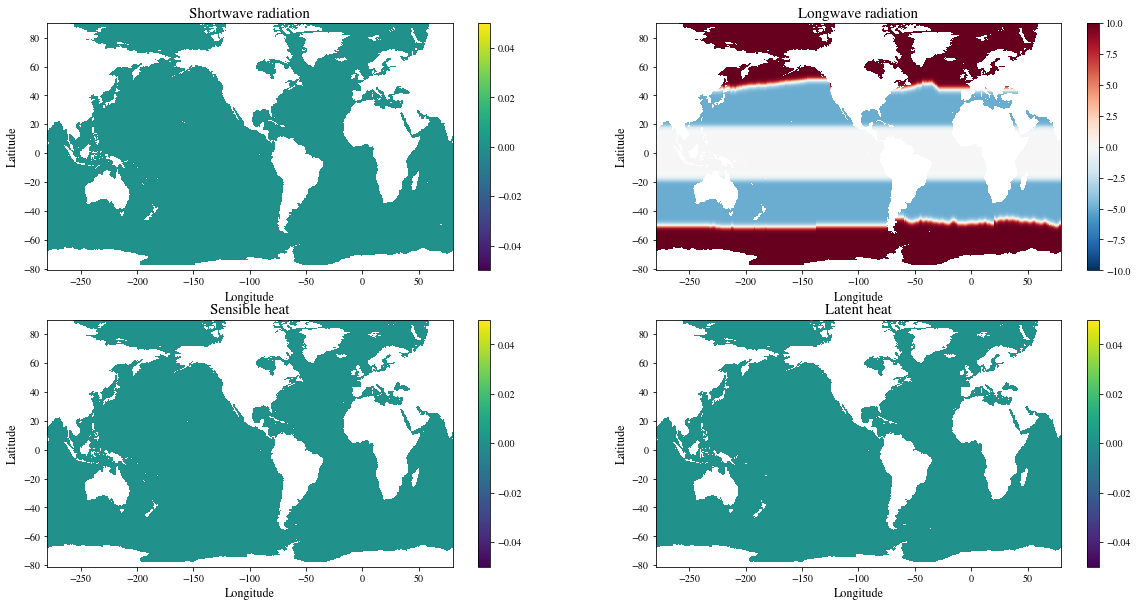

In [9]:
# Wind stress comparison

var_list = ['swflx', 'lw_heat', 'sens_heat', 'evap']
name = ['Shortwave radiation', 'Longwave radiation', 'Sensible heat', 'Latent heat']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
for i, j in enumerate(var_list):
    var1 = cc.querying.getvar(expt = expt[0], session = session[0], variable = var_list[i], frequency = '1 monthly', use_cftime = True).sel(
        time = slice(start_time, end_time))
    var2 = cc.querying.getvar(expt = expt[1], session = session[1], variable = var_list[i], frequency = '1 monthly', use_cftime = True).sel(
        time = slice(start_time, end_time))
    var1 = var1.rename('')
    var2 = var2.rename('')
    (var2 - var1).plot(ax = axes[int(i/2)][int(i%2)])
    axes[int(i/2)][int(i%2)].set_title(name[i], fontsize = 15)
    axes[int(i/2)][int(i%2)].set_xlabel('Longitude', fontsize = 12)
    axes[int(i/2)][int(i%2)].set_ylabel('Latitude', fontsize = 12)